In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [82]:
init_notebook_mode(connected=True) 

In [83]:
data = pd.read_csv('UFO/scrubbed.csv')

/Users/jakewarren/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.



In [84]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [85]:
data.country.unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [86]:
import plotly.express as px

In [87]:
data[data['country'] == 'us'].state.unique()

array(['tx', 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky', 'mi',
       'ma', 'ks', 'sc', 'wa', 'co', 'nh', 'wi', 'me', 'ga', 'pa', 'il',
       'ar', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'ne', 'or', 'ia', 'va',
       'id', 'nm', 'nj', 'wv', 'ok', 'ri', 'vt', 'la', 'pr', 'ak', 'ms',
       'ut', 'md', 'mt', 'wy', 'sd', 'de', 'nd', 'dc'], dtype=object)

In [88]:
us = data[data['country'] == 'us']

In [89]:
us['code'] = us['state'].str.upper()

<ipython-input-89-2e42ebf9a2c5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
us_counts = us['code'].value_counts().rename_axis('code').reset_index(name='count')

In [91]:
mydict = dict(type='choropleth',
            colorscale = 'ylorbr',
            locations = us_counts['code'],
            z = us_counts['count'],
            locationmode = 'USA-states',
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

In [92]:
layout = dict(title = 'UFO Sightings by State',
              geo = dict(scope='usa')
             )

In [93]:
choromap = go.Figure(data=mydict, layout=layout)

In [94]:
iplot(choromap)

In [95]:
print(data.country.unique())
countries = ['United States', 'Great Britain', 'Canada', 'Australia', 'Germany']

['us' nan 'gb' 'ca' 'au' 'de']


Text(0.5, 1.0, 'UFO sightings by country')

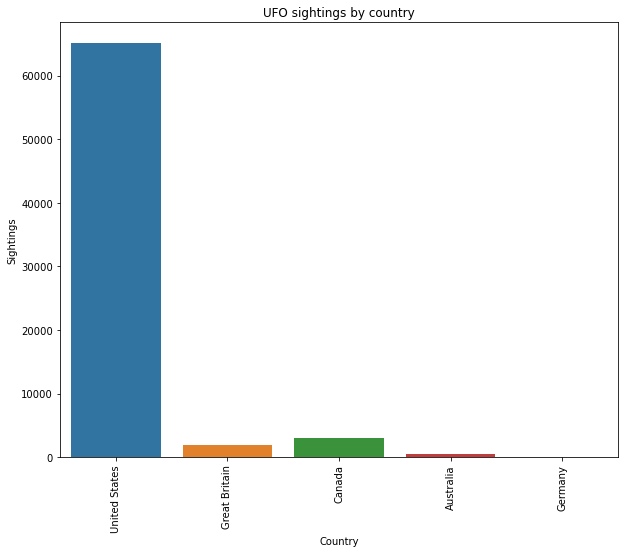

In [96]:
# A count plot of UFO sightings by country
plt.figure(figsize=(10,8))
ax = sns.countplot(x=data.country)
ax.set_xticklabels(countries)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Sightings')
plt.title('UFO sightings by country')


In [97]:
shape_count = data['shape'].value_counts()

Text(0.5, 1.0, 'Counts of top 10 sighting shapes')

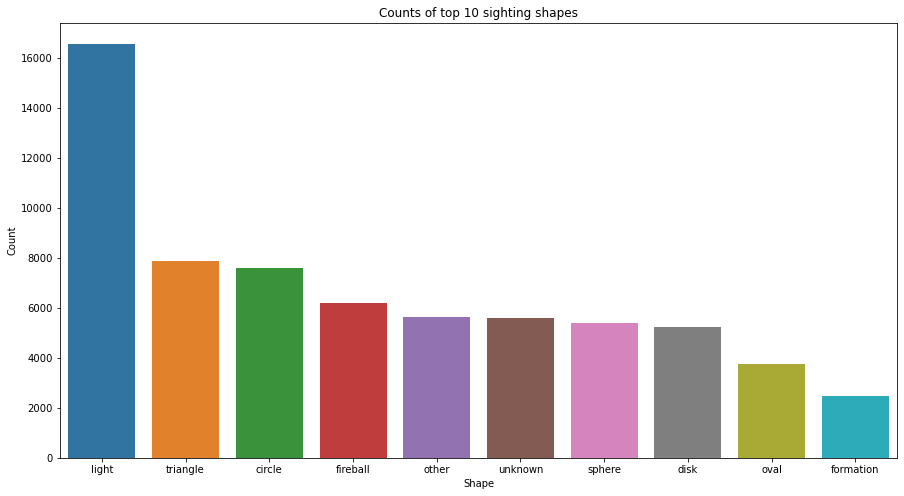

In [98]:
# A count plot of the top 10 sighting shapes.
plt.figure(figsize=(15,8))
ax = sns.barplot(x=shape_count[:10].index, y=shape_count[:10])
plt.xlabel('Shape')
plt.ylabel('Count')
plt.title('Counts of top 10 sighting shapes')

In [131]:
# I am separating the time, day, month, and year from the timestame and converting them from strings to integers
data['year'] = data['datetime'].str.split(' ').str[0].str.split('/').str[2].astype(int)
data['month'] = data['datetime'].str.split(' ').str[0].str.split('/').str[1].astype(int)
data['day'] = data['datetime'].str.split(' ').str[0].str.split('/').str[0].astype(int)
data['time'] = data['datetime'].str.split(' ').str[1]


In [151]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.14.3


In [154]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [197]:
# UFO sightings appear to drastically increase in the late 20th century into the 21st. This could be a lack of records
# or because of public interest and awareness.  There is a large dip in 2014 but this is probably because the data was
# only recorded for a partial year.
sightings_over_time.iplot()

In [173]:
data['duration (seconds)'] = data['duration (seconds)'].apply(lambda x: x[:-1] if '`' in x else x)

In [188]:
data['duration (seconds)'] = data['duration (seconds)'].astype(float)